# **Parkinson's Predict Group Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/AndyBC27/parkinsons-disease-data/main/parkinsons_disease_data.csv'
df = pd.read_csv(url)
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


# Question 2 EDAs

What is the distribution of UPDRS scores across different age groups?

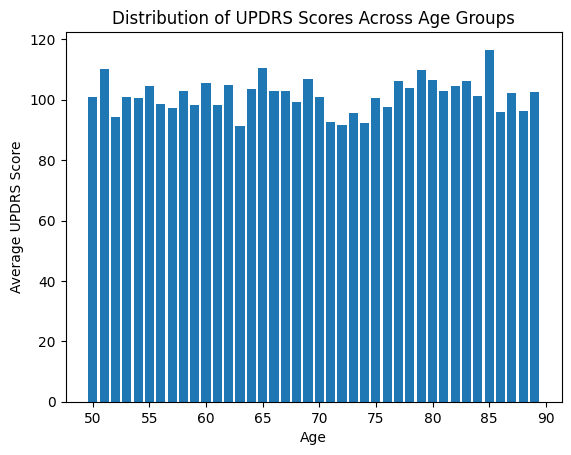

In [ ]:
import matplotlib.pyplot as plt
# Group the data by age and calculate the mean UPDRS score for each age group
age_groups = df.groupby('Age')['UPDRS'].mean()

# Create a bar plot to visualize the distribution
plt.bar(age_groups.index, age_groups.values)
plt.xlabel('Age')
plt.ylabel('Average UPDRS Score')
plt.title('Distribution of UPDRS Scores Across Age Groups')
plt.show()


This question aimed to explore how the severity of Parkinson's disease symptoms, as measured by the UPDRS score, varies with age. Understanding the distribution of UPDRS scores across different age ranges  will help in identifying whether certain ages have higher symptom severity and if age is a significant factor in the analysis. However as we can see from the graph the severity between different ages are pretty even.

How do BMI, physical activity, and alcohol consumption and sleep quality correlate with each other?

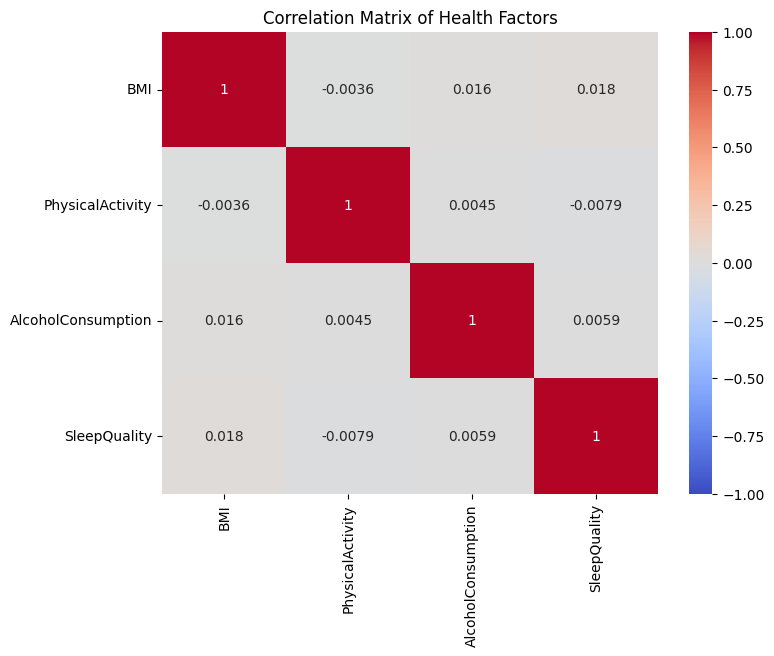

In [ ]:
import matplotlib.pyplot as plt
# Select the relevant columns
subset = df[['BMI', 'PhysicalActivity', 'AlcoholConsumption', 'SleepQuality']]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Health Factors')
plt.show()


This question investigates the relationships between the lifestyle and demographic factors in the dataset. By examining the correlations between BMI, physical activity, sleeping quality, and alcohol consumption, we could have identified potential multicollinearity issues and understood how these features might influence each other. However as we can see from this heatmap the correlation values are extremely low, thus suggesting that there aren't correlations.

What are the outliers and edge cases in the dataset, particularly in terms of extreme values for UPDRS scores, BMI, physical activity, sleeping quality, and alcohol consumption?

In [ ]:
# Define the columns to check for outliers
columns_to_check = ['UPDRS', 'BMI', 'PhysicalActivity', 'SleepQuality', 'AlcoholConsumption']

# Calculate the IQR for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers = {}
for column in columns_to_check:
  outliers[column] = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])]

# Print the outliers for each column
for column, outlier_df in outliers.items():
  print(f"Outliers for {column}:")
  print(outlier_df)
  print("\n")


Outliers for UPDRS:
Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryParkinsons, TraumaticBrainInjury, Hypertension, Diabetes, Depression, Stroke, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, UPDRS, MoCA, FunctionalAssessment, Tremor, Rigidity, Bradykinesia, PosturalInstability, SpeechProblems, SleepDisorders, Constipation, Diagnosis, DoctorInCharge]
Index: []

[0 rows x 35 columns]


Outliers for BMI:
Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryParkinsons, TraumaticBrainInjury, Hypertension, Diabetes, Depression, Stroke, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, UPDRS, MoCA, FunctionalAssessment, Tremor, Rigidity, Bradykinesia, Pos

By doing this EDA I tried to identifying outliers in the dataset, as outliers can sometimes negatively affect the results. However after conducting this EDA I can conclude that there aren't any outliers.

# Constructing the Model and Evaluating

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

ct = make_column_transformer(
  (StandardScaler(), ['Age', 'BMI', 'PhysicalActivity', 'SleepDisorders', 'AlcoholConsumption']),
  remainder = 'drop'
)

pipeline_linreg = make_pipeline(
    ct,
    LinearRegression()
)

X_train80, X_test20, y_train80, y_test20 = train_test_split(df, df["UPDRS"], test_size=0.2, random_state=42)

pipeline_linreg.fit(X=X_train80, y=y_train80)
y_test_predicted = pipeline_linreg.predict(X_test20)
np.sqrt(mean_squared_error(y_test20, y_test_predicted))
mae = mean_absolute_error(y_test20, y_test_predicted)
mae

50.52698185016206

In [ ]:
coefficients = pipeline_linreg.named_steps['linearregression'].coef_
feature_names = pipeline_linreg.named_steps['columntransformer'].get_feature_names_out()

for feature, coef in zip(feature_names, coefficients):
  print(f"{feature}: {coef}")


standardscaler__Age: -0.14469583138246092
standardscaler__BMI: 3.085003949957894
standardscaler__PhysicalActivity: 0.7626715639069573
standardscaler__SleepDisorders: -1.2539998299033561
standardscaler__AlcoholConsumption: 2.282810783608028


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

features = ['Age', 'BMI', 'PhysicalActivity', 'SleepQuality', 'AlcoholConsumption']
X = df[features]
y = df['UPDRS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with best KNN:", mae)


Best hyperparameters: {'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
Mean Absolute Error with best KNN: 51.79018724610965


In [ ]:
df['UPDRS'].describe()

,UPDRS
count,2105.000000
mean,101.415318
std,56.591448
min,0.028441
25%,53.048148
50%,102.561023
75%,149.831682
max,198.953604
